In [5]:
import yfinance as yf

In [6]:
btc_data1 = yf.download("BTC-USD", start="2022-01-01", end="2025-02-02")
btc_data1.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2022-01-01,47686.812500,47827.312500,46288.484375,46311.746094,24582667004
2022-01-02,47345.218750,47881.406250,46856.937500,47680.925781,27951569547
2022-01-03,46458.117188,47510.726562,45835.964844,47343.542969,33071628362
2022-01-04,45897.574219,47406.546875,45752.464844,46458.851562,42494677905
2022-01-05,43569.003906,46929.046875,42798.222656,45899.359375,36851084859


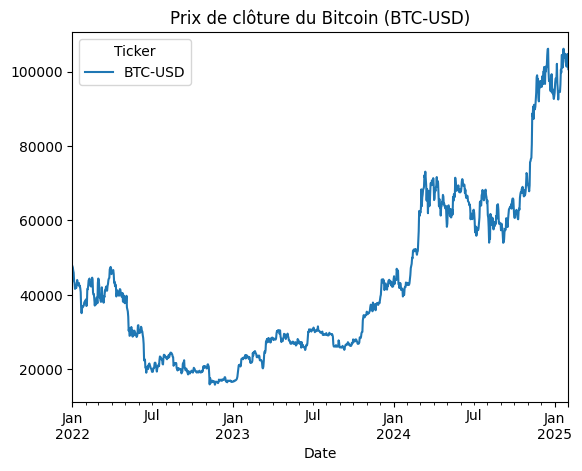

In [7]:
import matplotlib.pyplot as plt

btc_data1["Close"].plot(title="Prix de clôture du Bitcoin (BTC-USD)")
plt.show()

Calcul des rendements logarithmique du BTC

In [10]:
import numpy as np
closing_prices = btc_data1["Close"]
log_returns = np.log(closing_prices / closing_prices.shift(1))
print(log_returns)

Ticker       BTC-USD
Date                
2022-01-01       NaN
2022-01-02 -0.007189
2022-01-03 -0.018915
2022-01-04 -0.012139
2022-01-05 -0.052066
...              ...
2025-01-28 -0.007425
2025-01-29  0.023126
2025-01-30  0.009903
2025-01-31 -0.022500
2025-02-01 -0.017228

[1128 rows x 1 columns]


Calcul de la volatilité annualisée

In [ ]:
#volatilité quotidienne
daily_volatility = log_returns.std()

#volatilité annualisée
annual_vol = daily_volatility*np.sqrt(252)
print(annual_vol)

Ticker
BTC-USD    0.449371
dtype: float64


[*********************100%***********************]  1 of 1 completed


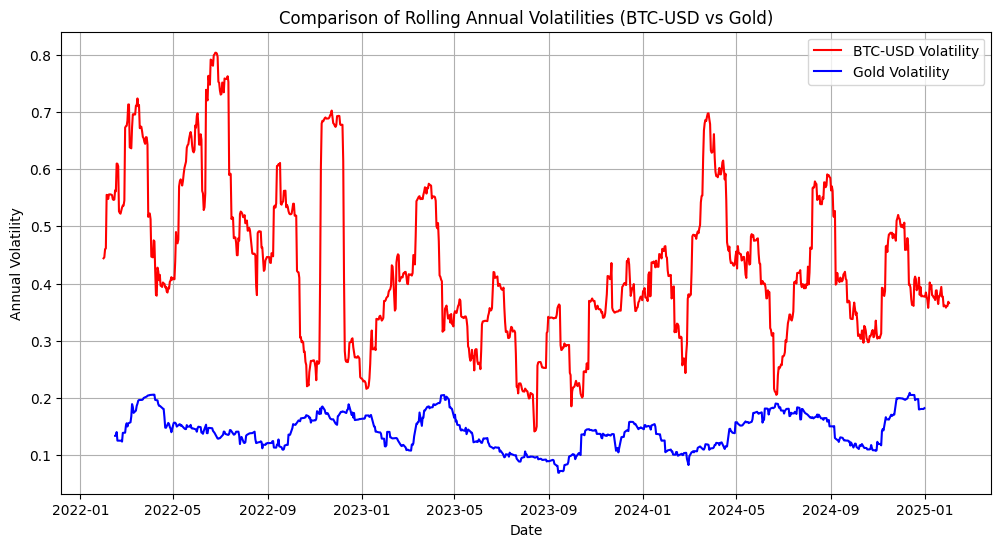

In [11]:
# Calculate a moving average of volatility
rolling_volatility = log_returns.rolling(window=30).std() * np.sqrt(252)

gold_data = yf.download("GC=F", start="2022-01-01", end="2025-01-02")
gold_prices = gold_data["Close"]
gold_log_returns = np.log(gold_prices / gold_prices.shift(1))
gold_rolling_volatility = gold_log_returns.rolling(window=30).std() * np.sqrt(252)

plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility, label="BTC-USD Volatility", color="red")
plt.plot(gold_rolling_volatility, label="Gold Volatility", color="blue")
plt.title("Comparison of Rolling Annual Volatilities (BTC-USD vs Gold)")
plt.xlabel("Date")
plt.ylabel("Annual Volatility")
plt.legend()
plt.grid()
plt.show()


Calcul du taux sans risque en utilisant les taux d'interets

In [12]:
ticker = "^IRX"  # Taux d'intérêt sur 13 semaines (proche du taux sans risque court terme)
data = yf.Ticker(ticker)

# Informations sur le taux
historical_data = data.history(period="1mo")  # Dernier mois de données

# Dernier taux disponible
latest_rate = historical_data["Close"].iloc[-1] / 100  # Divisé par 100 pour passer en décimal
print(f"Taux sans risque (approximation, dernier taux à 1 an) : {latest_rate:.4f}")

Taux sans risque (approximation, dernier taux à 1 an) : 0.0420


Definition formule fermée Black-Scholes

In [2]:
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma, option_type="call"):
   
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == "call":
        price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    elif option_type == "put":
        price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    else:
        raise ValueError("Le type d'option doit être 'call' ou 'put'.")
    
    return price

In [15]:
S=btc_data1['Close'].iloc[-1].item()
print(f"Dernier prix de clôture du Bitcoin: {S}")

Dernier prix de clôture du Bitcoin: 100655.90625


In [16]:
price = black_scholes(95000, 96000, 1, 0.04, 0.40, option_type="call")
print(price)

16262.240005619977


Let use a databse of real bitcoin option


In [ ]:
import pandas as pd
hist = pd.read_csv('/Users/Dell/OneDrive - De Vinci/Historique Option.csv',sep=';')
hist.head()

,Buy/Sell,Instrument,CALL/PUT,Price BTC,Price $,Volatility,Amount BTC,Amount BTC.1,Mark Price,Prix actuel BTC,Date
0,buy,BTC-28MAR25-140000-C,CALL,0.0012,$114.85,59.2%,0.3,0.3,0.0013,95707.30,"24 Feb 2025, 11:32:31"
1,buy,BTC-25FEB25-95500-C,CALL,0.0090,$861.45,40.4%,0.1,0.1,0.0092,95716.96,"24 Feb 2025, 11:31:50"
2,buy,BTC-25FEB25-95500-C,CALL,0.0090,$861.43,40.4%,0.1,0.1,0.0092,95714.19,"24 Feb 2025, 11:30:34"
3,buy,BTC-25FEB25-95500-C,CALL,0.0090,$861.42,40.4%,0.1,0.1,0.0092,95712.84,"24 Feb 2025, 11:30:34"
4,buy,BTC-25FEB25-95500-C,CALL,0.0090,$861.49,40.2%,0.1,0.1,0.0092,95721.22,"24 Feb 2025, 11:30:20"


In [18]:
hist.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Buy/Sell         705 non-null    object 
 1   Instrument       705 non-null    object 
 2   CALL/PUT         705 non-null    object 
 3   Price BTC        705 non-null    float64
 4   Price $          705 non-null    object 
 5   Volatility       705 non-null    object 
 6   Amount BTC       705 non-null    float64
 7   Amount BTC.1     705 non-null    float64
 8   Mark Price       705 non-null    float64
 9   Prix actuel BTC  705 non-null    float64
 10  Date             705 non-null    object 
dtypes: float64(5), object(6)
memory usage: 60.7+ KB


In [20]:
hist[['Asset', 'Maturity', 'Strike', 'Type']] = hist['Instrument'].str.extract(r'([A-Z]+)-(\d+[A-Z]{3}\d+)-(\d+)-([CP])')

In [21]:
hist.head()


,Buy/Sell,Instrument,CALL/PUT,Price BTC,Price $,Volatility,Amount BTC,Amount BTC.1,Mark Price,Prix actuel BTC,Date,Asset,Maturity,Strike,Type
0,buy,BTC-28MAR25-140000-C,CALL,0.0012,$114.85,59.2%,0.3,0.3,0.0013,95707.30,"24 Feb 2025, 11:32:31",BTC,28MAR25,140000,C
1,buy,BTC-25FEB25-95500-C,CALL,0.0090,$861.45,40.4%,0.1,0.1,0.0092,95716.96,"24 Feb 2025, 11:31:50",BTC,25FEB25,95500,C
2,buy,BTC-25FEB25-95500-C,CALL,0.0090,$861.43,40.4%,0.1,0.1,0.0092,95714.19,"24 Feb 2025, 11:30:34",BTC,25FEB25,95500,C
3,buy,BTC-25FEB25-95500-C,CALL,0.0090,$861.42,40.4%,0.1,0.1,0.0092,95712.84,"24 Feb 2025, 11:30:34",BTC,25FEB25,95500,C
4,buy,BTC-25FEB25-95500-C,CALL,0.0090,$861.49,40.2%,0.1,0.1,0.0092,95721.22,"24 Feb 2025, 11:30:20",BTC,25FEB25,95500,C


In [30]:
hist['Maturity'] = pd.to_datetime(hist['Maturity'], format='%d%b%y')
hist.head()

,Buy/Sell,Instrument,CALL/PUT,Price BTC,Price $,Volatility,Amount BTC,Amount BTC.1,Mark Price,Prix actuel BTC,Date,Asset,Maturity,Strike,Type
0,buy,BTC-28MAR25-140000-C,CALL,0.0012,$114.85,0.592,0.3,0.3,0.0013,95707.30,"24 Feb 2025, 11:32:31",BTC,2025-03-28,140000,C
1,buy,BTC-25FEB25-95500-C,CALL,0.0090,$861.45,0.404,0.1,0.1,0.0092,95716.96,"24 Feb 2025, 11:31:50",BTC,2025-02-25,95500,C
2,buy,BTC-25FEB25-95500-C,CALL,0.0090,$861.43,0.404,0.1,0.1,0.0092,95714.19,"24 Feb 2025, 11:30:34",BTC,2025-02-25,95500,C
3,buy,BTC-25FEB25-95500-C,CALL,0.0090,$861.42,0.404,0.1,0.1,0.0092,95712.84,"24 Feb 2025, 11:30:34",BTC,2025-02-25,95500,C
4,buy,BTC-25FEB25-95500-C,CALL,0.0090,$861.49,0.402,0.1,0.1,0.0092,95721.22,"24 Feb 2025, 11:30:20",BTC,2025-02-25,95500,C


In [62]:
hist['Price $']=hist['Price $'].astype(float)

In [49]:
hist['Price $'] = hist['Price $'].str.replace('$', '').str.replace(',', '').astype(float)

On convertie la volatilité en décimal

In [28]:
hist['Volatility'] = hist['Volatility'].str.rstrip('%').astype('float') / 100.0 

In [ ]:
from datetime import datetime

fixed_date = pd.to_datetime('2025-02-25')
hist['Time to Maturity'] = (hist['Maturity'] - fixed_date).dt.days / 365.0

# Calcul des prix Black-Scholes
risk_free_rate = 0.042  
hist['BS Price'] = hist.apply(lambda row: black_scholes(
    row['Prix actuel BTC'],
    row['Strike'],
    row['Time to Maturity'],
    risk_free_rate,
    row['Volatility'],
     "call" if row['CALL/PUT'] == "CALL" else "put"
), axis=1)
#drop les colonnes ou notre prix est égale à 0 (car maturité de 1 jour = trop court)
seuil = 0.001
# Supprimer les lignes où les valeurs de 'Price $' sont inférieures au seuil
hist = hist[hist['BS Price'] >= seuil]

# Calcul des écarts en pourcentage
hist['Price Diff %'] = abs(hist['Price $'] - hist['BS Price']) / hist['Price $'] * 100

# Moyenne des écarts en pourcentage
mean_diff = hist['Price Diff %'].mean()

# Affichage des résultats
print(hist[['Price $', 'BS Price', 'Price Diff %']])
print(f"Moyenne des écarts en pourcentage : {mean_diff:.2f}%")

     Price $    BS Price  Price Diff %
0     114.85  101.398919     11.711869
1     861.45  216.960000     74.814557
2     861.43  214.190000     75.135530
3     861.42  212.840000     75.291960
4     861.49  221.220000     74.321234
..       ...         ...           ...
694   344.65  286.408720     16.898674
695   526.57  341.938562     35.063038
696  1053.22  984.497722      6.524969
702   813.81  596.632473     26.686515
704   861.69  630.836030     26.790838

[521 rows x 3 columns]
Moyenne des écarts en pourcentage : 33.65%


C:\Users\Dell\AppData\Local\Temp\ipykernel_25144\3226952256.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))


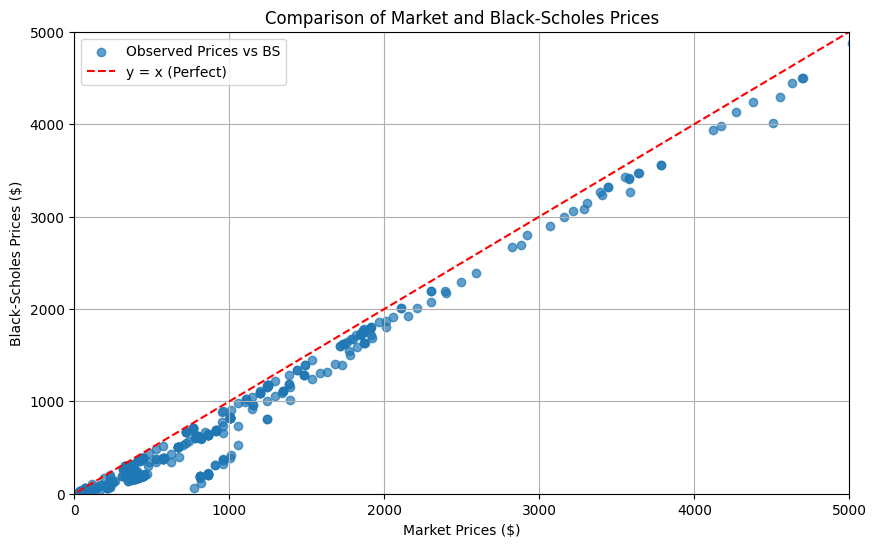

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(hist['Price $'], hist['BS Price'], alpha=0.7, label='Observed Prices vs BS')
plt.plot([min(hist['Price $']), max(hist['Price $'])], [min(hist['Price $']), max(hist['Price $'])], 
         color='red', linestyle='--', label='y = x (Perfect)')
plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.xlabel("Market Prices ($)")
plt.ylabel("Black-Scholes Prices ($)")
plt.title("Comparison of Market and Black-Scholes Prices")
plt.legend()
plt.grid(True)
plt.show()



#### Modèle de Heston 

Estimation des paramètres sur le Bitcoin

 Initial Variance

In [8]:
from scipy.optimize import minimize
from scipy.stats import norm

In [11]:
print(log_returns)

Ticker       BTC-USD
Date                
2022-01-01       NaN
2022-01-02 -0.007189
2022-01-03 -0.018915
2022-01-04 -0.012139
2022-01-05 -0.052066
...              ...
2025-01-28 -0.007425
2025-01-29  0.023126
2025-01-30  0.009903
2025-01-31 -0.022500
2025-02-01 -0.017228

[1128 rows x 1 columns]


In [12]:
variance = log_returns**2
variance_annual = variance * np.sqrt(365)
print(variance_annual)

Ticker       BTC-USD
Date                
2022-01-01       NaN
2022-01-02  0.000987
2022-01-03  0.006835
2022-01-04  0.002815
2022-01-05  0.051792
...              ...
2025-01-28  0.001053
2025-01-29  0.010218
2025-01-30  0.001874
2025-01-31  0.009672
2025-02-01  0.005670

[1128 rows x 1 columns]


In [13]:
print(variance_annual.describe())

Ticker       BTC-USD
count   1.127000e+03
mean    1.530413e-02
std     3.868201e-02
min     8.542724e-10
25%     4.915995e-04
50%     3.163602e-03
75%     1.280286e-02
max     5.787716e-01


In [14]:
v0 = variance_annual.iloc[1]
print(v0)

Ticker
BTC-USD    0.000987
Name: 2022-01-02 00:00:00, dtype: float64


In [15]:
theta = variance_annual.mean()
print(theta)

Ticker
BTC-USD    0.015304
dtype: float64


In [16]:
Delta_Variance = variance_annual.diff()
print(Delta_Variance)

Ticker       BTC-USD
Date                
2022-01-01       NaN
2022-01-02       NaN
2022-01-03  0.005848
2022-01-04 -0.004020
2022-01-05  0.048976
...              ...
2025-01-28  0.000409
2025-01-29  0.009164
2025-01-30 -0.008344
2025-01-31  0.007799
2025-02-01 -0.004002

[1128 rows x 1 columns]


# Estimation des paramètres κ et θ

## 1. Réarrangement de l'équation

L'équation suivante décrit la dynamique de la variance dans le modèle de Heston :

\begin{equation}
\Delta v_t = \kappa \cdot \theta \cdot \Delta t - \kappa \cdot v_t \cdot \Delta t
\end{equation}

Avec :
\begin{equation}
\Delta v_t = v_{t+1} - v_t
\end{equation}
, la variation de la variance.
\begin{equation}
\Delta t = 1
\end{equation}
, si vous travaillez sur une base journalière.

## 2. Régression linéaire

On peut reformuler l'équation ci-dessus pour effectuer une régression linéaire :

\begin{equation}
y = a + b \cdot x
\end{equation}

Avec :
\begin{equation}
y = \Delta v_t = v_{t+1} - v_t
\end{equation}
, la delta variance.
\begin{equation}
x = v_t
\end{equation}
, la variance au temps \(t\).

\begin{equation}
a = \kappa \cdot \theta
\end{equation}

\begin{equation}
b = - \kappa
\end{equation}

## 3. Estimation des paramètres

Une fois les coefficients \(a\) et \(b\) obtenus via la régression linéaire, on calcule :

\begin{equation}
\kappa = -b
\end{equation}

\begin{equation}
\theta = \frac{a}{\kappa}
\end{equation}


In [17]:
def estimate_kappa_theta(variance):
    variance = variance.dropna()
    variance = variance.to_numpy().flatten()
    y = variance[1:]  # Current variance
    x = variance[:-1]  # Lagged variance
    A = np.vstack([x, np.ones(len(x))]).T
    kappa, c = np.linalg.lstsq(A, y, rcond=None)[0]  # Linear regression to estimate κ and θ
    theta = c / (1 - kappa)
    return kappa, theta

In [18]:
kappa, theta = estimate_kappa_theta(variance_annual)
print(f"Estimated κ: {kappa:.6f}, Estimated θ: {theta:.6f}")

Estimated κ: 0.149378, Estimated θ: 0.015318


In [19]:
Delta_Variance

Ticker,BTC-USD
Date,
2022-01-01,NaN
2022-01-02,NaN
2022-01-03,0.005848
2022-01-04,-0.004020
2022-01-05,0.048976
...,...
2025-01-28,0.000409
2025-01-29,0.009164
2025-01-30,-0.008344


In [20]:
log_returns= log_returns.values.flatten().tolist()  
Delta_Variance = Delta_Variance.values.flatten().tolist()


In [23]:
import pandas as pd
log_returns = pd.DataFrame(log_returns, columns=["Valeurs"])
Delta_Variance = pd.DataFrame(Delta_Variance, columns=["Valeurs"])

In [24]:
log_returns=log_returns.dropna()
Delta_Variance=Delta_Variance.dropna()  

In [25]:
rho = log_returns["Valeurs"].corr(Delta_Variance["Valeurs"])
print(f"Correlation between log returns and delta variance: {rho:.4f}")

Correlation between log returns and delta variance: -0.0495


In [26]:
sigma = Delta_Variance["Valeurs"].std()  # Remplacez par le nom de la colonne
print(f"Standard deviation of delta variance: {sigma:.6f}")

Standard deviation of delta variance: 0.050474


In [27]:
import numpy as np
from scipy.integrate import quad

def heston_char_func(phi, S0, v0, T, r, kappa, theta, sigma, rho, P):
    """
    Fonction caractéristique pour le modèle de Heston.
    """
    i = complex(0, 1)
    if P == 1:
        u = 0.5
        b = kappa - rho * sigma
    elif P == 2:
        u = -0.5
        b = kappa

    a = kappa * theta
    d = np.sqrt((rho * sigma * phi * i - b)**2 - sigma**2 * (2 * u * phi * i - phi**2))
    g = (b - rho * sigma * phi * i + d) / (b - rho * sigma * phi * i - d)

    C = (r * phi * i * T +
         (a / sigma**2) * ((b - rho * sigma * phi * i + d) * T - 2 * np.log((1 - g * np.exp(d * T)) / (1 - g))))
    D = ((b - rho * sigma * phi * i + d) / sigma**2) * ((1 - np.exp(d * T)) / (1 - g * np.exp(d * T)))

    return np.exp(C + D * v0 + i * phi * np.log(S0))

In [28]:

def heston_integrand(phi, S0, K, T, r, v0, kappa, theta, sigma, rho, P):
    """
    Intégrande utilisée dans la formule fermée pour pricer une option européenne.
    """
    i = complex(0, 1)
    char_func = heston_char_func(phi - (i * 0.5), S0, v0, T, r, kappa, theta, sigma, rho, P)
    return np.real((np.exp(-i * phi * np.log(K)) * char_func) / (i * phi))

In [29]:
def heston_option_price(S0, K, T, r, v0, kappa, theta, sigma, rho, option_type="call"):
    """
    Calcul du prix d'une option européenne avec la formule fermée du modèle de Heston.
    
    Inputs:
    - S0: Prix initial de l'actif
    - K: Prix d'exercice
    - T: Maturité
    - r: Taux sans risque
    - v0: Variance initiale
    - kappa: Taux de réversion
    - theta: Moyenne à long terme de la variance
    - sigma: Volatilité de la variance
    - rho: Corrélation entre l'actif et la variance
    - option_type: "call" ou "put"
    
    Outputs:
    - Prix de l'option
    """
    P1 = 0.5 + (1 / np.pi) * quad(lambda phi: heston_integrand(phi, S0, K, T, r, v0, kappa, theta, sigma, rho, P=1), 0, 100)[0]
    P2 = 0.5 + (1 / np.pi) * quad(lambda phi: heston_integrand(phi, S0, K, T, r, v0, kappa, theta, sigma, rho, P=2), 0, 100)[0]
    
    call_price = np.exp(-r * T) * (S0 * P1 - K * P2)
    
    if option_type == "call":
        return call_price
    elif option_type == "put":
        put_price = call_price - S0 + K * np.exp(-r * T)
        return put_price
    else:
        raise ValueError("Le type d'option doit être 'call' ou 'put'.")


In [30]:
def heston_characteristic_function(u, S0, K, r, T, kappa, theta, sigma, rho, v0):
   xi = kappa - rho * sigma * 1j * u
   d = np.sqrt((rho * sigma * 1j * u - xi)**2 - sigma**2 * (-u * 1j - u**2))
   g = (xi - rho * sigma * 1j * u - d) / (xi - rho * sigma * 1j * u + d)
   C = r * 1j * u * T + (kappa * theta) / sigma**2 * ((xi - rho * sigma * 1j * u - d) * T - 2 * np.log((1 - g * np.exp(-d * T)) / (1 - g)))
   D = (xi - rho * sigma * 1j * u - d) / sigma**2 * ((1 - np.exp(-d * T)) / (1 - g * np.exp(-d * T)))
   return np.exp(C + D * v0 + 1j * u * np.log(S0))

# Define functions to compute call and put options prices
def heston_call_price(S0, K, r, T, kappa, theta, sigma, rho, v0):
   integrand = lambda u: np.real(np.exp(-1j * u * np.log(K)) / (1j * u) * heston_characteristic_function(u - 1j, S0, K, r, T, kappa, theta, sigma, rho, v0))
   integral, _ = quad(integrand, 0, np.inf)
   return np.exp(-r * T) * 0.5 * S0 - np.exp(-r * T) / np.pi * integral


def heston_put_price(S0, K, r, T, kappa, theta, sigma, rho, v0):
   integrand = lambda u: np.real(np.exp(-1j * u * np.log(K)) / (1j * u) * heston_characteristic_function(u - 1j, S0, K, r, T, kappa, theta, sigma, rho, v0))
   integral, _ = quad(integrand, 0, np.inf)
   return np.exp(-r * T) / np.pi * integral - S0 + K * np.exp(-r * T)

In [31]:
S0=95000
K=100000
r=0.04
T=5
call_price = heston_call_price(S0, K, r, T, 2,0.05,0.3,-0.5,0.05)
print("European Call Option Price:", np.round(call_price, 2))


European Call Option Price: 15076.49


In [32]:
print(kappa, theta, sigma, rho)

0.14937796671784762 0.015317576721032448 0.050473657049955656 -0.04949844446639108


In [33]:
heston_option_price(95000, 96000, 1, 0.04,v0, kappa, theta, sigma, rho, option_type="call")

np.float64(311881.17869738536)

In [34]:
black_scholes(95000, 100000, 10, 0.04, 0.592, option_type="call")

np.float64(67371.6302724023)

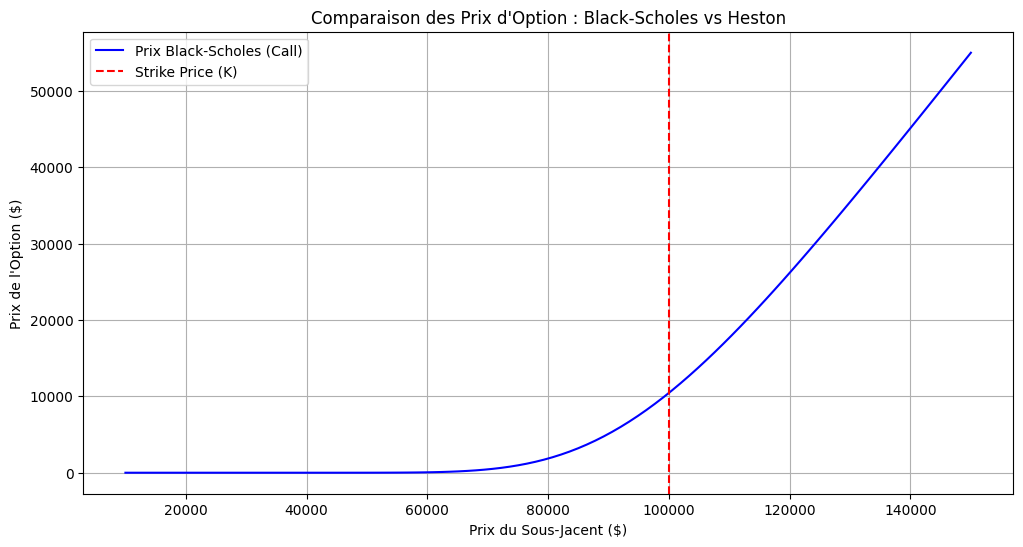

In [35]:
import numpy as np  
import matplotlib.pyplot as plt
# Paramètres de l'option
S_min = 10000  # Prix minimum du sous-jacent
S_max = 150000  # Prix maximum du sous-jacent
K = 100000    # Prix d'exercice
T = 1        # Temps à maturité (en années)
r = 0.05     # Taux sans risque
sigma = 0.2  # Volatilité pour Black-Scholes

# Paramètres pour Heston
kappa = 3
theta = 0.04
v0 = 0.04
rho = -0.7
vol_of_vol = 0.5
S0 = 100

# Plage de prix du sous-jacent
S_values = np.linspace(S_min, S_max, 100)

bs_prices = [black_scholes(S, K, T, r, sigma, option_type="call") for S in S_values]
#heston_prices = [heston_option_price(S0, K, T, r, kappa, theta, v0, rho, vol_of_vol, option_type="call") for S in S_values]

# Création du graphe
plt.figure(figsize=(12, 6))
plt.plot(S_values, bs_prices, label="Prix Black-Scholes (Call)", color="blue")
plt.axvline(x=K, color="red", linestyle="--", label="Strike Price (K)")
plt.xlabel("Prix du Sous-Jacent ($)")
plt.ylabel("Prix de l'Option ($)")
plt.title("Comparaison des Prix d'Option : Black-Scholes vs Heston")
plt.legend()
plt.grid(True)
plt.show()